In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from warnings import filterwarnings
from sklearn.preprocessing import LabelEncoder

filterwarnings('ignore')
os.chdir(r"/Users/bentofh/Documents/GitHub/Store Sales")

Conforme conversado com o Anwar, como no nosso .csv de teste não existem dados de sales, por se tratar de uma competição do Kaggle, teremos que nós mesmos gerarmos nosso dataset de teste, que será uma parte dos dados disponíveis em train.csv 

In [157]:
df = pd.read_csv('train.csv')

In [158]:
df['date'] = pd.to_datetime(df['date'])

In [159]:
df.head()

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0


In [160]:
# Suponha que você tenha um DataFrame 'df' e queira converter a coluna 'coluna_texto' para valores numéricos
mapeamento_valores_family = {}

# Criar um dicionário para mapear valores únicos para números
for i, valor in enumerate(df['family'].unique()):
    mapeamento_valores_family[valor] = i

# Substituir os valores na coluna 'coluna_texto' pelos números correspondentes
df['family_numerica'] = df['family'].map(mapeamento_valores_family)

# Exemplo de como consultar o mapeamento de valores
print("Mapeamento de valores:")
for valor, numero in mapeamento_valores_family.items():
    print(f"{valor}: {numero}")

Mapeamento de valores:
AUTOMOTIVE: 0
BABY CARE: 1
BEAUTY: 2
BEVERAGES: 3
BOOKS: 4
BREAD/BAKERY: 5
CELEBRATION: 6
CLEANING: 7
DAIRY: 8
DELI: 9
EGGS: 10
FROZEN FOODS: 11
GROCERY I: 12
GROCERY II: 13
HARDWARE: 14
HOME AND KITCHEN I: 15
HOME AND KITCHEN II: 16
HOME APPLIANCES: 17
HOME CARE: 18
LADIESWEAR: 19
LAWN AND GARDEN: 20
LINGERIE: 21
LIQUOR,WINE,BEER: 22
MAGAZINES: 23
MEATS: 24
PERSONAL CARE: 25
PET SUPPLIES: 26
PLAYERS AND ELECTRONICS: 27
POULTRY: 28
PREPARED FOODS: 29
PRODUCE: 30
SCHOOL AND OFFICE SUPPLIES: 31
SEAFOOD: 32


In [161]:
# Suponha que você tenha um DataFrame 'df' e queira converter a coluna 'coluna_texto' para valores numéricos
mapeamento_valores_date = {}

# Criar um dicionário para mapear valores únicos para números
for i, valor in enumerate(df['date'].unique()):
    mapeamento_valores_date[valor] = i

# Substituir os valores na coluna 'coluna_texto' pelos números correspondentes
df['date_numerica'] = df['date'].map(mapeamento_valores_date)

# Exemplo de como consultar o mapeamento de valores
print("Mapeamento de valores:")
for valor, numero in mapeamento_valores_date.items():
    print(f"{valor}: {numero}")

Mapeamento de valores:
2013-01-01 00:00:00: 0
2013-01-02 00:00:00: 1
2013-01-03 00:00:00: 2
2013-01-04 00:00:00: 3
2013-01-05 00:00:00: 4
2013-01-06 00:00:00: 5
2013-01-07 00:00:00: 6
2013-01-08 00:00:00: 7
2013-01-09 00:00:00: 8
2013-01-10 00:00:00: 9
2013-01-11 00:00:00: 10
2013-01-12 00:00:00: 11
2013-01-13 00:00:00: 12
2013-01-14 00:00:00: 13
2013-01-15 00:00:00: 14
2013-01-16 00:00:00: 15
2013-01-17 00:00:00: 16
2013-01-18 00:00:00: 17
2013-01-19 00:00:00: 18
2013-01-20 00:00:00: 19
2013-01-21 00:00:00: 20
2013-01-22 00:00:00: 21
2013-01-23 00:00:00: 22
2013-01-24 00:00:00: 23
2013-01-25 00:00:00: 24
2013-01-26 00:00:00: 25
2013-01-27 00:00:00: 26
2013-01-28 00:00:00: 27
2013-01-29 00:00:00: 28
2013-01-30 00:00:00: 29
2013-01-31 00:00:00: 30
2013-02-01 00:00:00: 31
2013-02-02 00:00:00: 32
2013-02-03 00:00:00: 33
2013-02-04 00:00:00: 34
2013-02-05 00:00:00: 35
2013-02-06 00:00:00: 36
2013-02-07 00:00:00: 37
2013-02-08 00:00:00: 38
2013-02-09 00:00:00: 39
2013-02-10 00:00:00: 40
201

In [162]:
df.head()

,id,date,store_nbr,family,sales,onpromotion,family_numerica,date_numerica
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,0,0
1,1,2013-01-01,1,BABY CARE,0.0,0,1,0
2,2,2013-01-01,1,BEAUTY,0.0,0,2,0
3,3,2013-01-01,1,BEVERAGES,0.0,0,3,0
4,4,2013-01-01,1,BOOKS,0.0,0,4,0


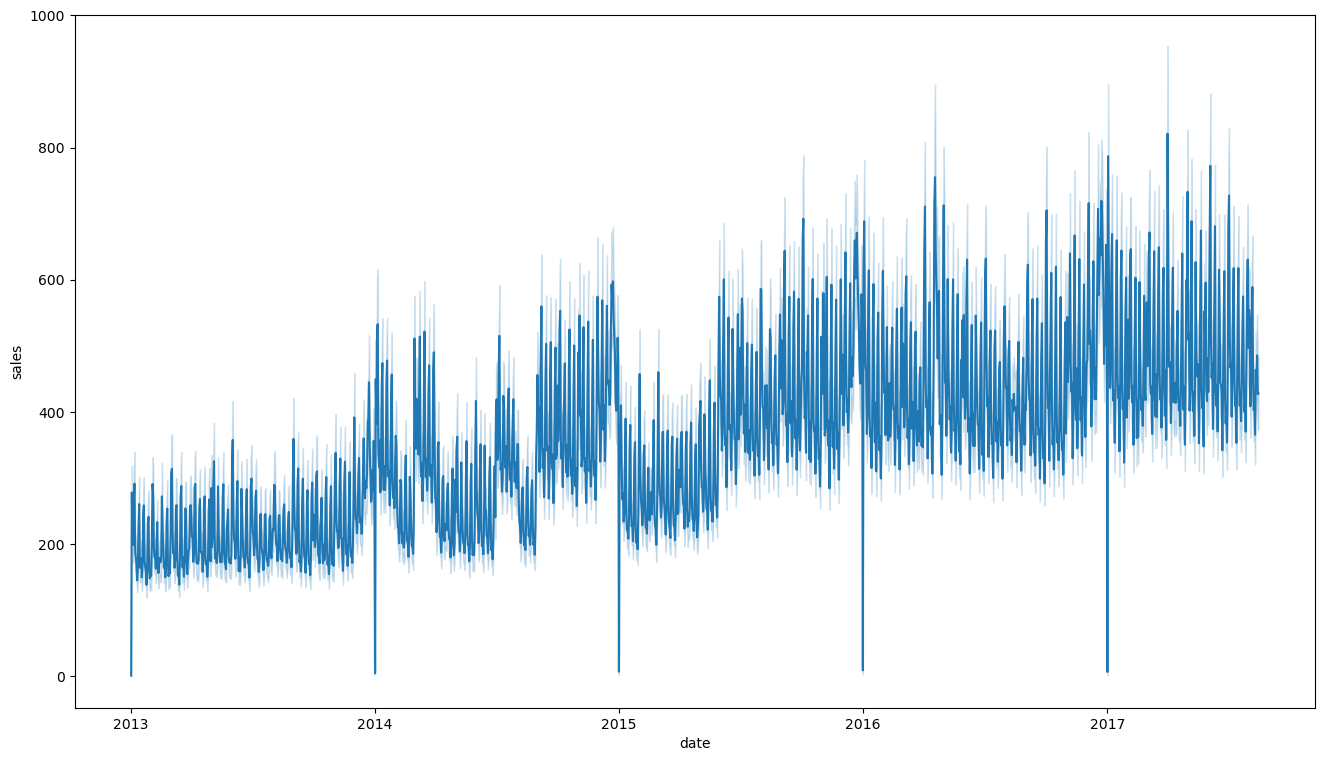

In [77]:
plt.figure(figsize = (16, 9))
sns.lineplot(x = df.date, y = df.sales)
plt.show()

## Analisando as datas

In [163]:
print("Data mínima:", df['date'].min())
print("Data máxima:", df['date'].max())
print("Quantidade de registros por ano e mês:")
print(df['date'].dt.to_period('M').value_counts().sort_index())

Data mínima: 2013-01-01 00:00:00
Data máxima: 2017-08-15 00:00:00
Quantidade de registros por ano e mês:
date
2013-01    55242
2013-02    49896
2013-03    55242
2013-04    53460
2013-05    55242
2013-06    53460
2013-07    55242
2013-08    55242
2013-09    53460
2013-10    55242
2013-11    53460
2013-12    53460
2014-01    55242
2014-02    49896
2014-03    55242
2014-04    53460
2014-05    55242
2014-06    53460
2014-07    55242
2014-08    55242
2014-09    53460
2014-10    55242
2014-11    53460
2014-12    53460
2015-01    55242
2015-02    49896
2015-03    55242
2015-04    53460
2015-05    55242
2015-06    53460
2015-07    55242
2015-08    55242
2015-09    53460
2015-10    55242
2015-11    53460
2015-12    53460
2016-01    55242
2016-02    51678
2016-03    55242
2016-04    53460
2016-05    55242
2016-06    53460
2016-07    55242
2016-08    55242
2016-09    53460
2016-10    55242
2016-11    53460
2016-12    53460
2017-01    55242
2017-02    49896
2017-03    55242
2017-04    53460
2017-0

In [164]:
# Criando nosso arquivo de teste com os meses 6, 7 e 8/2017
test = df[df['date'] >= pd.to_datetime('2017-06-01 00:00:00')]

In [165]:
test.shape

(135432, 8)

In [166]:
df2 = df[df['date'] < pd.to_datetime('2017-06-01 00:00:00')]

In [167]:
df2.date.describe()

count                          2865456
mean     2015-03-17 06:00:53.731343616
min                2013-01-01 00:00:00
25%                2014-02-07 18:00:00
50%                2015-03-17 12:00:00
75%                2016-04-23 06:00:00
max                2017-05-31 00:00:00
Name: date, dtype: object

In [174]:
treino = df2[df2['date'] >= pd.to_datetime('2015-03-17 00:00:00')]
validacao = df2[df2['date'] < pd.to_datetime('2015-03-17 00:00:00')]

In [175]:
print(treino.shape, validacao.shape)

(1434510, 8) (1430946, 8)


In [176]:
treino = treino.drop(columns=['date', 'family'])
validacao = validacao.drop(columns=['date', 'family'])

In [177]:
treino.head()

,id,store_nbr,sales,onpromotion,family_numerica,date_numerica
1430946,1430946,1,3.0,0,0,803
1430947,1430947,1,0.0,0,1,803
1430948,1430948,1,2.0,0,2,803
1430949,1430949,1,1034.0,0,3,803
1430950,1430950,1,0.0,0,4,803


In [178]:
validacao.head()

,id,store_nbr,sales,onpromotion,family_numerica,date_numerica
0,0,1,0.0,0,0,0
1,1,1,0.0,0,1,0
2,2,1,0.0,0,2,0
3,3,1,0.0,0,3,0
4,4,1,0.0,0,4,0


In [179]:
# Fernando
# Tentando converter os tipos de dados do df
# Melhor cenário é add o label_enconder em um loop
# Adicionar mais informações a partir da data, mes - ano - semana - fim de semana 

# fit_transform x transform
# Anwar = usar fit_transfom somente no treino, na validação usar somente transform

# Substitui o label encoder pelo código acima 
#label_encoder_dt = LabelEncoder()
#label_encoder_fam = LabelEncoder()

In [182]:
# Fernando
# Aqui eu deveria passar todas as colunas do df que não é a coluna do target?

X_train = treino[['date_numerica', 'store_nbr', 'family_numerica', 'onpromotion']]
X_val = validacao[['date_numerica', 'store_nbr', 'family_numerica', 'onpromotion']]

y_train = treino['sales']
y_val = validacao['sales'] 

In [183]:
X_train.head()

,date_numerica,store_nbr,family_numerica,onpromotion
1430946,803,1,0,0
1430947,803,1,1,0
1430948,803,1,2,0
1430949,803,1,3,0
1430950,803,1,4,0


In [184]:
%%time

from lightgbm import LGBMRegressor
modelo = LGBMRegressor( max_depth = 5, 
                        num_leaves = 32, 
                        verbose = -1, 
                        learning_rate = 0.01, 
                        n_estimators = 1000, 
                        colsample_bytree = 0.1, 
                        random_state = 0)
modelo.fit(X_train, y_train)

CPU times: user 50.1 s, sys: 8.76 s, total: 58.9 s
Wall time: 8.84 s


LGBMRegressor(colsample_bytree=0.1, learning_rate=0.01, max_depth=5,
              n_estimators=1000, num_leaves=32, random_state=0, verbose=-1)

In [185]:
predictions = pd.Series(modelo.predict(X_val))

In [186]:
ranked_predictions = predictions.rank(pct = True, method = 'first')
correlation = np.corrcoef(y_val, ranked_predictions)[0, 1]
correlation

0.40522102849395

## Conseguindo o valor de TESTE 

In [188]:
test = test.drop(columns=['date', 'family'])

In [189]:
test.head()

,id,store_nbr,sales,onpromotion,family_numerica,date_numerica
2865456,2865456,1,6.0,0,0,1608
2865457,2865457,1,0.0,0,1,1608
2865458,2865458,1,1.0,0,2,1608
2865459,2865459,1,2250.0,9,3,1608
2865460,2865460,1,3.0,0,4,1608


In [191]:
X_test = test[['date_numerica', 'store_nbr', 'family_numerica', 'onpromotion']]
y_test = test['sales'] # Não tem coluna de target ????

predictions = pd.Series(modelo.predict(X_test))
ranked_predictions = predictions.rank(pct = True, method = 'first')
correlation = np.corrcoef(y_test, ranked_predictions)[0, 1]
correlation

0.4972433906227336